## **Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from pandas import DataFrame

from numpy import ndarray

# **Exploring Dataset**

Importing dataset using Pandas

In [2]:
df: DataFrame = pd.read_csv('income.csv')

Viewing dataset and all its columns

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Counts the number of occurrences of each unique value in the `education` column.  

In [4]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

# **One-Hot Encoding**

The purpose of **One-Hot Encoding** is to convert categorical data into a numerical format that can be used for Machine Learning algorithms.
It creates a binary column for each category in the data, where each observation is marked with a 1 in the column for its corresponding category and 0 in the other columns. This allows the Machine Learning algorithms to understand the categorical data as numerical data and make predications based on it. It also prevents ordering from being introduces into the data which can affect the model predictions. 

Counts the number of occurrences of each unique value in the `occupation` column.  

In [5]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

Creating dummy variables for the `occupation` column using **One-Hot Encoding**. 
It first drops the `occupation` column and then concatenates the original DataFrame with the new dummy variables. 

In [6]:
df: DataFrame = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1) 

In [7]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,Private,226802,11th,7,Never-married,Own-child,Black,Male,0,...,False,False,True,False,False,False,False,False,False,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,...,True,False,False,False,False,False,False,False,False,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Husband,White,Male,0,...,False,False,False,False,False,False,True,False,False,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Husband,Black,Male,7688,...,False,False,True,False,False,False,False,False,False,False
4,18,?,103497,Some-college,10,Never-married,Own-child,White,Female,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,...,False,False,False,False,False,False,False,False,True,False
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,...,False,False,True,False,False,False,False,False,False,False
48839,58,Private,151910,HS-grad,9,Widowed,Unmarried,White,Female,0,...,False,False,False,False,False,False,False,False,False,False
48840,22,Private,201490,HS-grad,9,Never-married,Own-child,White,Male,0,...,False,False,False,False,False,False,False,False,False,False


Creating dummy variables for the `workclass` column using **One-Hot Encoding**. 
It first drops the `workclass` column and then concatenates the original DataFrame with the new dummy variables. 

In [8]:
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)

Dropping the `education` column as it is not needed. 

In [9]:
df = df.drop('education', axis=1)

Creating dummy variables for the `marital-status` column using **One-Hot Encoding**. 
It first drops the `marital-status` column and then concatenates the original DataFrame with the new dummy variables.

In [10]:
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)

Creating dummy variables for the `relationship` column using **One-Hot Encoding**. 
It first drops the `relationship` column and then concatenates the original DataFrame with the new dummy variables.

In [11]:
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)

Creating dummy variables for the `race` column using **One-Hot Encoding**. 
It first drops the `race` column and then concatenates the original DataFrame with the new dummy variables.

In [12]:
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)

Creating dummy variables for the `native-country` column using **One-Hot Encoding**. 
It first drops the `native-country` column and then concatenates the original DataFrame with the new dummy variables.

In [13]:
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

Creating a new column `gender` in the DataFrame by applying a lambda function tot the values in the existing `gender` column. 
The lambda function checks if the values in the `gender` column is equal to 'Male' and returns 1 if it is, and 0 otherwise (Female). 
This is a binary attribute. 

In [14]:
df['gender'] = df['gender'].apply(lambda x : 1 if x == 'Male' else 0)

Creating a new column `income` in the DataFrame by applying a lambda function tot the values in the existing `income` column. 
The lambda function checks if the values in the `income` column is equal to '>50K' and returns 1 if it is, and 0 otherwise ('<50K'). 
This is a binary attribute. 

In [15]:
df['income'] = df['income'].apply(lambda x : 1 if x == '>50K' else 0)

In [16]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,0,30,0,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,1,0,0,20,0,False,True,...,False,False,False,False,False,False,False,True,False,False


Creating a heatmap of the correlation matrix. 
This creates a 18 by 12 inch figure (heatmap in this case). 
Each cell in the heatmap represents the correlation between 2 variables in the data frame.

This visualizes the the relationships between variables making it easier to identify trends and patterns within the data. 
This information can be useful for feature selection, identifying potential predictors, and understanding the underlying structure of the data. 

<Axes: >

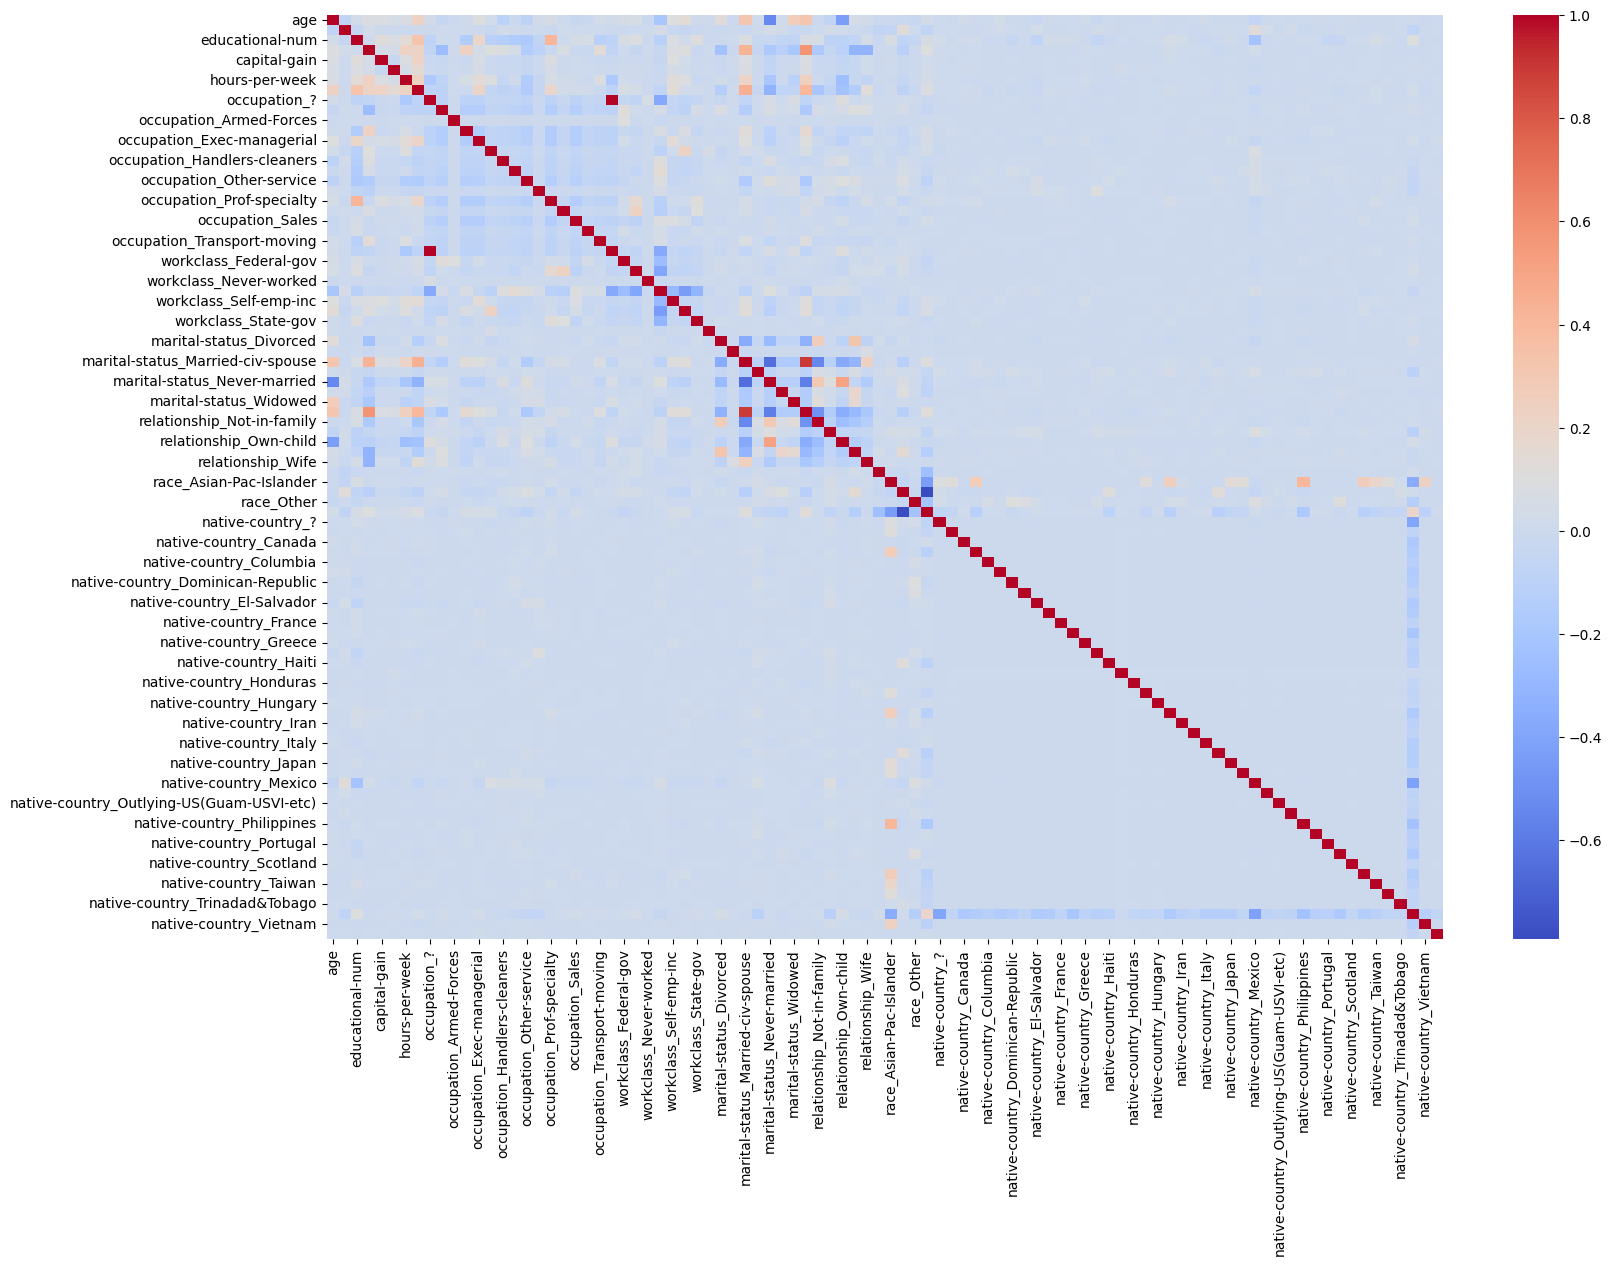

In [17]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

Calculating the absolute correlation between the `income` column and all other columns in the data frame. 
1. The correlation between all the pairs of columns using the `corr()` function. This returns a Pandas Series object containing the correlation coefficients in the data frame (similar to a dictionary.)
2. The `['income']` argument specifies that the correction to be calculated is for the `income`
3. Finally the absolute value of the correlations is computed using the `abs()` function. 

In [18]:
correlations = df.corr()['income'].abs() 

Sorting the correlation coefficients in ascending order. 
By default, this returns a new Series objects.

In [19]:
sorted_correlations = correlations.sort_values()

Calculating the number of columns to drop. 
In this case, 80% of the columns will be dropped. 
This is done to reduce the size of the data frame, improving performance and simplifying the data analysis. 
The data is still large enough for it to be useful.  

In [20]:
num_cols_to_drop = int(0.8 * len(df.columns))

Selecting the actual columns that need to be dropped.
This will drop from the first column to the number computed in the previous cell.

In [21]:
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index

Dropping the columns that were previously selected. 

In [22]:
df_dropped = df.drop(cols_to_drop, axis=1)

In [23]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


Visualizing heatmap again after dropping some columns. 
Displaying values for correlations this time. 

<Axes: >

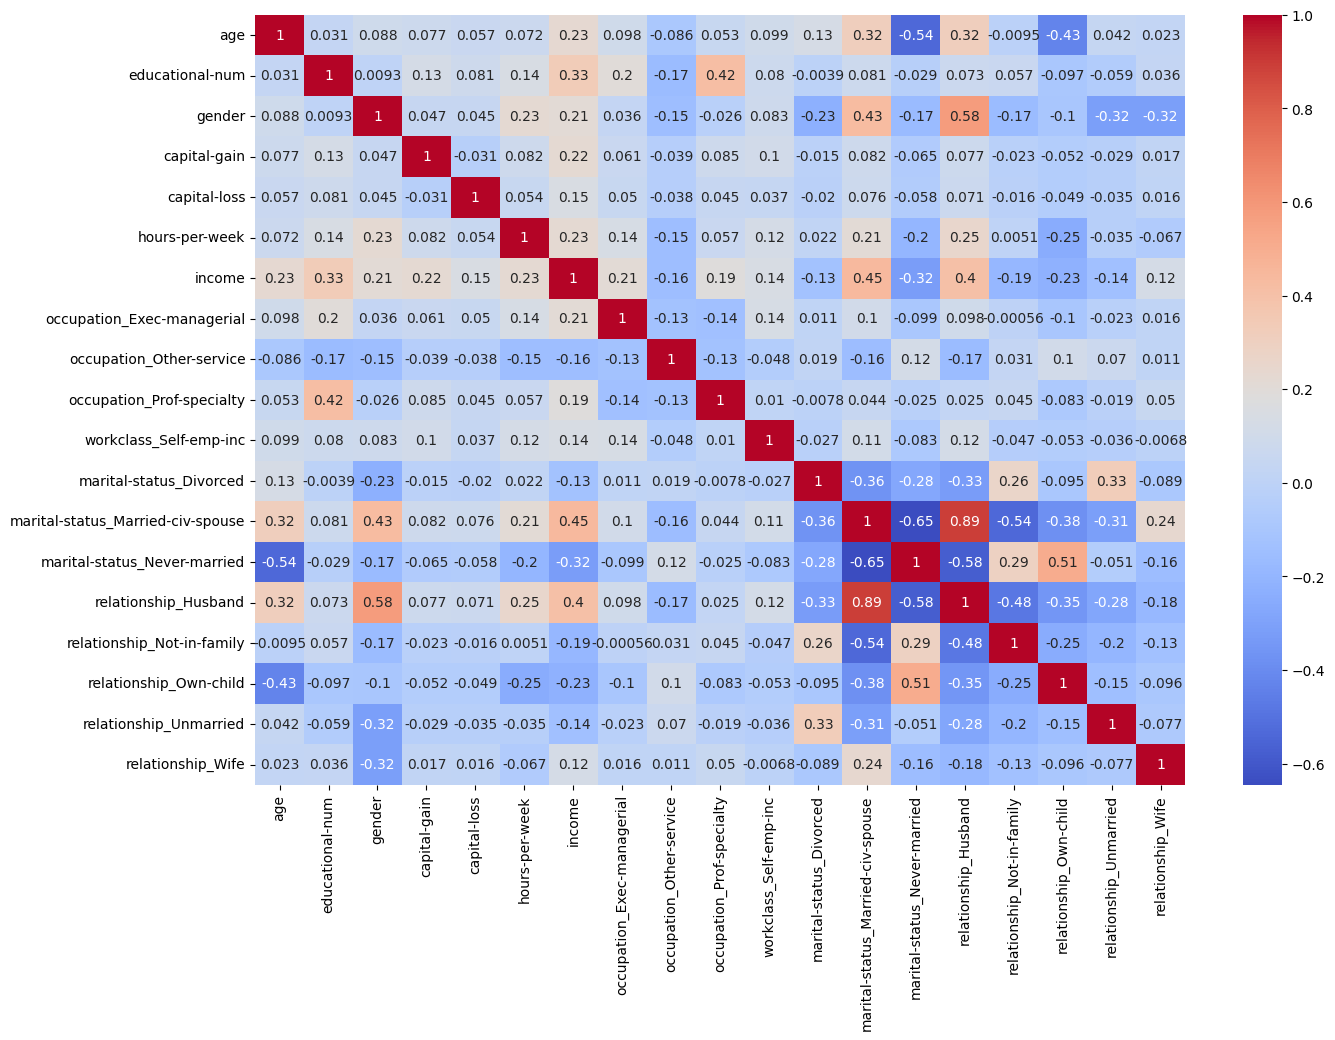

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

# **Splitting Dataset**

Dropping the `fnlwgt` as it is redundant. 

In [25]:
df: DataFrame = df.drop('fnlwgt', axis=1)

Splitting the big data frame into 2 smaller data frames:
- Training - 80% of the larger data frame used for training the model.
- Testing - 20% of the larger data frame used for testing the trained model against for its accuracy. 

In [26]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [27]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
46801,21,9,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7750,49,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
33234,44,12,1,4386,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
41179,37,5,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
17115,72,7,0,0,0,24,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25841,42,10,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
29915,45,8,1,2407,0,50,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
10649,62,9,1,0,0,44,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
11161,55,15,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [28]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
42679,35,13,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
26544,44,10,1,0,1980,45,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16698,30,7,0,0,0,19,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10448,24,10,1,0,0,35,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32791,33,9,1,0,0,37,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37158,48,6,0,0,0,35,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
44924,42,9,1,0,0,47,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48296,46,13,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
25371,31,6,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


Splitting both the 2 data frames into features `X` and variables `y`.


In [29]:
X_train: DataFrame = train_df.drop('income', axis=1)
y_train: DataFrame = train_df['income']

X_test: DataFrame = test_df.drop('income', axis=1)
y_test: DataFrame = test_df['income']

# **Feature Scaling**

Feature scaling is the process of adjusting the range of features in your data so that they are on a similar scale. It is necessary because many machine learning algorithms use distance measures or optimization techniques that are sensitive to the scale of the data. Without scaling, features with larger ranges can dominate those with smaller ranges, leading to poor model performance.

There are different types of scaling:

1. **Standardization**: Transforms data to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Scaling**: Scales data to a fixed range, usually 0 to 1.
3. **Robust Scaling**: Uses the median and interquartile range, making it less sensitive to outliers.

Algorithms that need feature scaling include:

1. Logistic Regression
2. K-Nearest Neighbors (K-NN)
3. Support Vector Machines (SVM)
4. Kernel SVM

In [30]:
standard_scaler = StandardScaler()

X_train_scaled: ndarray = standard_scaler.fit_transform(X_train)
X_test_scaled: ndarray = standard_scaler.transform(X_test)

# **Training**

Training different algorithms on the data and comparing their performance.

## **Random Forest Classifier**

Initiating a Random Forest classifier which is used for training the model. 
This classifier is appropriate as it is good for binary just like this dataset. 
The training set is then fitted into the classifier for training.
After training, the `forest` object storing the classifier can be used to make predictions. 

In [31]:
random_forest_best = RandomForestClassifier()
random_forest_best.fit(X_train, y_train)

RandomForestClassifier()

Calculating the accuracy score of the model against the test set. 
It makes predictions on the features and computes a predictions, it then compares its predictions with the actual data within.

In [32]:
random_forest_score: float = random_forest_best.score(X_test, y_test)
random_forest_score

0.8522878493192753

## **Logistics Regression**

In [33]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

Calculating the accuracy score of the model against the test set. 
It makes predictions on the features and computes a predictions, it then compares its predictions with the actual data within.

In [34]:
logistic_regression_score: float = log_reg.score(X_test_scaled, y_test)
logistic_regression_score

0.8557682464940116

## **K-Nearest Neighbour**

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Calculating the accuracy score of the model against the test set. 
It makes predictions on the features and computes a predictions, it then compares its predictions with the actual data within.

In [36]:
k_nearest_neighbors_score: float = knn.score(X_test_scaled, y_test)
k_nearest_neighbors_score

0.8335551233493704

## Support Vector Machine (SVM)

In [37]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

Calculating the accuracy score of the model against the test set. 
It makes predictions on the features and computes a predictions, it then compares its predictions with the actual data within.

In [38]:
svm_score: float = svm.score(X_test_scaled, y_test)
svm_score

0.8551540587572934

## **Kernel SVM**

In [39]:
ksvm = SVC(kernel='rbf')
ksvm.fit(X_train_scaled, y_train)

SVC()

Calculating the accuracy score of the model against the test set. 
It makes predictions on the features and computes a predictions, it then compares its predictions with the actual data within.

In [40]:
kernel_svm_score: float = ksvm.score(X_test_scaled, y_test)
kernel_svm_score

0.8551540587572934

## **Naive Bayes Classifier**

In [41]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

Calculating the accuracy score of the model against the test set. 
It makes predictions on the features and computes a predictions, it then compares its predictions with the actual data within.

In [42]:
naive_bayes_score: float = nbc.score(X_test, y_test)
naive_bayes_score

0.8003889855665882

## **Decision Tree Classifier**

In [43]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

Calculating the accuracy score of the model against the test set. 
It makes predictions on the features and computes a predictions, it then compares its predictions with the actual data within.

In [44]:
decision_tree_score: float = dtc.score(X_test, y_test)
decision_tree_score

0.8255706827720339

## **Comparing Algorithms**

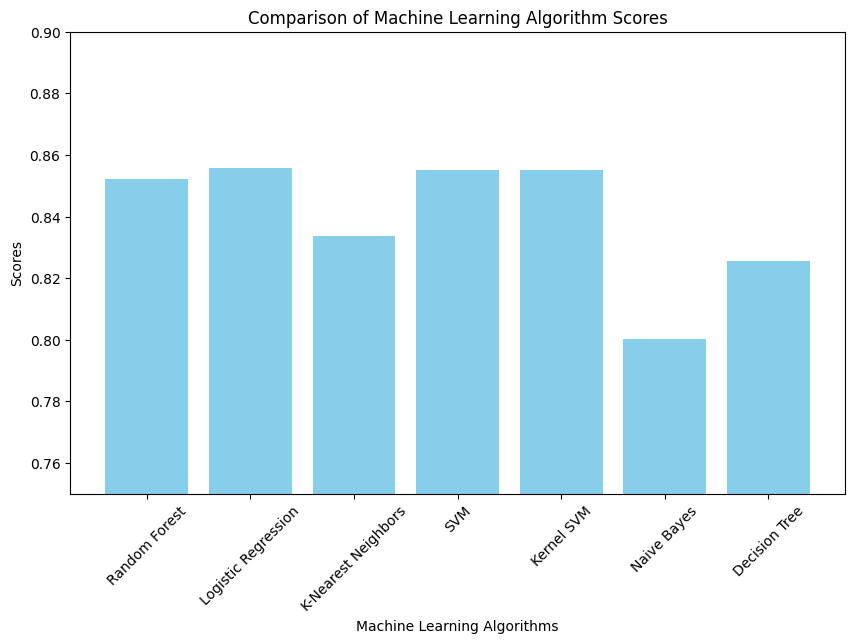

In [45]:
scores: dict[str, float] = {
	'Random Forest': random_forest_score,
	'Logistic Regression': logistic_regression_score,
	'K-Nearest Neighbors': k_nearest_neighbors_score,
	'SVM': svm_score,
	'Kernel SVM': kernel_svm_score,
	'Naive Bayes': naive_bayes_score,
	'Decision Tree': decision_tree_score
}

plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.ylim(0.75, 0.9)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Scores')
plt.title('Comparison of Machine Learning Algorithm Scores')
plt.xticks(rotation=45)
plt.show()

# **Hyperparameter Tuning**

Hyperparameter tuning is the process of selecting the optimal hyperparameters for a machine learning model. Hyperparameters are parameters that are set before training the model, such as the learning rate, regularization strength, and number of hidden layers in a neural network. 

Hyperparameter tuning works by selecting different values for the hyperparameters and evaluating the performance of the model on a validation set. The hyperparameters that result in the best performance on the validation set are selected as the optimal hyperparameters for the model. 

Hyperparameter tuning is important because it can significantly improve the performance of a machine learning model. By selecting the optimal hyperparameters, the model can better fit the training data and generalize to new data.

## **Random Forest Classifier**

In [46]:
param_grid_rf: dict[str, list[float | str]] = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

Creating a `GridSearchCV` object that performs hyperparameter tuning on a Random Forest classifier. 
Each value in the entry of hyperparameters would be tested with each other until the most optimal combination is found. 
The `verbose` argument specifies the level of detail to print during the hyperparameter tuning process.
This would return an object that is then used to perform the tuning on the Random Forest classifier.  

In [47]:
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, verbose=10)

Using the previously created object to actually do the hyperparameter tuning on the training data. 
Here is where the Grid Search would test different combination of hyperparameters that were previously created. 
The best set of hyperparameters would result in the highest accuracy score for the model for the validation set.

Once the hyperparameter tuning process is complete, the resulting output is a `GridSearchCV` object that contains the best set of hyperparameters for the Random Forest classifier. 
This object can be used to make predictions on the new data using the `predict()` functions. 

In [48]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50


[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.842 total time=   1.9s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   1.6s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.833 total time=   1.3s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.830 total time=   1.5s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 5/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.832 total time=   1.6s
[CV 1/5; 2/48] START max_depth=5, m

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

Returning the best estimator found during the hyperparameter tuning process. 
This is the model that resulted in the highest accuracy score on the validation set during the tuning process. 

In [49]:
random_forest_best = grid_search_rf.best_estimator_ 
random_forest_best

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=4,
                       n_estimators=250)

Calculating the accuracy score of the model against the test set using the new model. 
This should be more accurate than before when hyperparameter tuning was not used. 

In [50]:
random_forest_best.score(X_test, y_test)

0.8667212611321528

## **Logistic Regression**

In [51]:
param_grid_lr: dict[str, list[float | str]] = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [52]:
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, verbose=10)

In [53]:
grid_search_lr.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5; 1/100] START C=0.01, penalty=l1, solver=newton-cg......................
[CV 1/5; 1/100] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 1/100] START C=0.01, penalty=l1, solver=newton-cg......................
[CV 2/5; 1/100] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.1s
[CV 3/5; 1/100] START C=0.01, penalty=l1, solver=newton-cg......................
[CV 3/5; 1/100] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 1/100] START C=0.01, penalty=l1, solver=newton-cg......................
[CV 4/5; 1/100] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5; 1/100] START C=0.01, penalty=l1, solver=newton-cg......................
[CV 5/5; 1/100] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5; 2/100] START C=0.01, penalty=l1, solver=lbfgs..........................
[CV 1/5; 2/

/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 5/100] END C=0.01, penalty=l1, solver=saga;, score=0.849 total time=  16.5s
[CV 2/5; 5/100] START C=0.01, penalty=l1, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 5/100] END C=0.01, penalty=l1, solver=saga;, score=0.852 total time=  18.9s
[CV 3/5; 5/100] START C=0.01, penalty=l1, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 5/100] END C=0.01, penalty=l1, solver=saga;, score=0.850 total time=  19.0s
[CV 4/5; 5/100] START C=0.01, penalty=l1, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 5/100] END C=0.01, penalty=l1, solver=saga;, score=0.846 total time=  16.9s
[CV 5/5; 5/100] START C=0.01, penalty=l1, solver=saga...........................
[CV 5/5; 5/100] END C=0.01, penalty=l1, solver=saga;, score=0.847 total time=   9.8s
[CV 1/5; 6/100] START C=0.01, penalty=l2, solver=newton-cg......................
[CV 1/5; 6/100] END C=0.01, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.9s
[CV 2/5; 6/100] START C=0.01, penalty=l2, solver=newton-cg......................
[CV 2/5; 6/100] END C=0.01, penalty=l2, solver=newton-cg;, score=0.856 total time=   0.7s
[CV 3/5; 6/100] START C=0.01, penalty=l2, solver=newton-cg......................
[CV 3/5; 6/100] END C=0.01, penalty=l2, solver=newton-cg;, score=0.851 total time=   1.0s
[CV 4/5; 6/100] START C=0.01, penalty=l2, solver=newton-cg......................
[CV 4/5; 6/100] END C=0.01, penalty=l2, solver=newton-cg;, score=0.849 total time=   1.4s
[CV 5/5; 6/100] START C=0.01, penalty=l2, solver=newton-cg.......

/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 9/100] END C=0.01, penalty=l2, solver=sag;, score=0.850 total time=  10.5s
[CV 2/5; 9/100] START C=0.01, penalty=l2, solver=sag............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 9/100] END C=0.01, penalty=l2, solver=sag;, score=0.855 total time=  11.8s
[CV 3/5; 9/100] START C=0.01, penalty=l2, solver=sag............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 9/100] END C=0.01, penalty=l2, solver=sag;, score=0.851 total time=  10.1s
[CV 4/5; 9/100] START C=0.01, penalty=l2, solver=sag............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 9/100] END C=0.01, penalty=l2, solver=sag;, score=0.849 total time=  11.3s
[CV 5/5; 9/100] START C=0.01, penalty=l2, solver=sag............................
[CV 5/5; 9/100] END C=0.01, penalty=l2, solver=sag;, score=0.846 total time=   4.3s
[CV 1/5; 10/100] START C=0.01, penalty=l2, solver=saga..........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 10/100] END C=0.01, penalty=l2, solver=saga;, score=0.851 total time=  19.5s
[CV 2/5; 10/100] START C=0.01, penalty=l2, solver=saga..........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 10/100] END C=0.01, penalty=l2, solver=saga;, score=0.855 total time=  19.1s
[CV 3/5; 10/100] START C=0.01, penalty=l2, solver=saga..........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 10/100] END C=0.01, penalty=l2, solver=saga;, score=0.850 total time=  18.6s
[CV 4/5; 10/100] START C=0.01, penalty=l2, solver=saga..........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 10/100] END C=0.01, penalty=l2, solver=saga;, score=0.848 total time=  17.4s
[CV 5/5; 10/100] START C=0.01, penalty=l2, solver=saga..........................
[CV 5/5; 10/100] END C=0.01, penalty=l2, solver=saga;, score=0.846 total time=  10.9s
[CV 1/5; 11/100] START C=0.01, penalty=elasticnet, solver=newton-cg.............
[CV 1/5; 11/100] END C=0.01, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 11/100] START C=0.01, penalty=elasticnet, solver=newton-cg.............
[CV 2/5; 11/100] END C=0.01, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 11/100] START C=0.01, penalty=elasticnet, solver=newton-cg.............
[CV 3/5; 11/100] END C=0.01, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 11/100] START C=0.01, penalty=elasticnet, solver=newton-cg.............
[CV 4/5; 11/100] END C=0.01, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5; 11/100] START C=0.01, pena

/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 25/100] END C=0.1, penalty=l1, solver=saga;, score=0.851 total time=  15.1s
[CV 2/5; 25/100] START C=0.1, penalty=l1, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 25/100] END C=0.1, penalty=l1, solver=saga;, score=0.856 total time=  21.3s
[CV 3/5; 25/100] START C=0.1, penalty=l1, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 25/100] END C=0.1, penalty=l1, solver=saga;, score=0.852 total time=  18.6s
[CV 4/5; 25/100] START C=0.1, penalty=l1, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 25/100] END C=0.1, penalty=l1, solver=saga;, score=0.848 total time=  22.8s
[CV 5/5; 25/100] START C=0.1, penalty=l1, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 25/100] END C=0.1, penalty=l1, solver=saga;, score=0.846 total time=  25.6s
[CV 1/5; 26/100] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 1/5; 26/100] END C=0.1, penalty=l2, solver=newton-cg;, score=0.851 total time=   2.8s
[CV 2/5; 26/100] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 2/5; 26/100] END C=0.1, penalty=l2, solver=newton-cg;, score=0.857 total time=   3.6s
[CV 3/5; 26/100] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 3/5; 26/100] END C=0.1, penalty=l2, solver=newton-cg;, score=0.851 total time=   3.9s
[CV 4/5; 26/100] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 4/5; 26/100] END C=0.1, penalty=l2, solver=newton-cg;, score=0.849 total time=   3.4s
[CV 5/5; 26/100] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 5/5; 26/100] END C=0.1, penalty=l2, solver=newton-cg;, score=0.845 total time=   3.7s
[CV 1/5; 27/100] START C=0.1, penalty=l2, solver=lbfgs......

/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 29/100] END C=0.1, penalty=l2, solver=sag;, score=0.850 total time=  16.5s
[CV 2/5; 29/100] START C=0.1, penalty=l2, solver=sag............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 29/100] END C=0.1, penalty=l2, solver=sag;, score=0.856 total time=  16.1s
[CV 3/5; 29/100] START C=0.1, penalty=l2, solver=sag............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 29/100] END C=0.1, penalty=l2, solver=sag;, score=0.852 total time=  16.2s
[CV 4/5; 29/100] START C=0.1, penalty=l2, solver=sag............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 29/100] END C=0.1, penalty=l2, solver=sag;, score=0.850 total time=  16.0s
[CV 5/5; 29/100] START C=0.1, penalty=l2, solver=sag............................
[CV 5/5; 29/100] END C=0.1, penalty=l2, solver=sag;, score=0.845 total time=  13.9s
[CV 1/5; 30/100] START C=0.1, penalty=l2, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 30/100] END C=0.1, penalty=l2, solver=saga;, score=0.851 total time=  21.1s
[CV 2/5; 30/100] START C=0.1, penalty=l2, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 30/100] END C=0.1, penalty=l2, solver=saga;, score=0.856 total time=  20.5s
[CV 3/5; 30/100] START C=0.1, penalty=l2, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 30/100] END C=0.1, penalty=l2, solver=saga;, score=0.851 total time=  20.2s
[CV 4/5; 30/100] START C=0.1, penalty=l2, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 30/100] END C=0.1, penalty=l2, solver=saga;, score=0.848 total time=  19.5s
[CV 5/5; 30/100] START C=0.1, penalty=l2, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 30/100] END C=0.1, penalty=l2, solver=saga;, score=0.845 total time=  19.6s
[CV 1/5; 31/100] START C=0.1, penalty=elasticnet, solver=newton-cg..............
[CV 1/5; 31/100] END C=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.1s
[CV 2/5; 31/100] START C=0.1, penalty=elasticnet, solver=newton-cg..............
[CV 2/5; 31/100] END C=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 31/100] START C=0.1, penalty=elasticnet, solver=newton-cg..............
[CV 3/5; 31/100] END C=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 31/100] START C=0.1, penalty=elasticnet, solver=newton-cg..............
[CV 4/5; 31/100] END C=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5; 31/100] START C=0.1, penalty=elasticnet, solver=newton-cg..............
[CV 5/5; 31/100] END C=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5; 32/100] START C=0.1, 

/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 45/100] END C=1, penalty=l1, solver=saga;, score=0.851 total time=  21.3s
[CV 2/5; 45/100] START C=1, penalty=l1, solver=saga.............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 45/100] END C=1, penalty=l1, solver=saga;, score=0.856 total time=  20.5s
[CV 3/5; 45/100] START C=1, penalty=l1, solver=saga.............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 45/100] END C=1, penalty=l1, solver=saga;, score=0.851 total time=  20.2s
[CV 4/5; 45/100] START C=1, penalty=l1, solver=saga.............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 45/100] END C=1, penalty=l1, solver=saga;, score=0.849 total time=  23.0s
[CV 5/5; 45/100] START C=1, penalty=l1, solver=saga.............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 45/100] END C=1, penalty=l1, solver=saga;, score=0.846 total time=  21.7s
[CV 1/5; 46/100] START C=1, penalty=l2, solver=newton-cg........................
[CV 1/5; 46/100] END C=1, penalty=l2, solver=newton-cg;, score=0.851 total time=   1.3s
[CV 2/5; 46/100] START C=1, penalty=l2, solver=newton-cg........................
[CV 2/5; 46/100] END C=1, penalty=l2, solver=newton-cg;, score=0.857 total time=   2.1s
[CV 3/5; 46/100] START C=1, penalty=l2, solver=newton-cg........................
[CV 3/5; 46/100] END C=1, penalty=l2, solver=newton-cg;, score=0.852 total time=   1.5s
[CV 4/5; 46/100] START C=1, penalty=l2, solver=newton-cg........................
[CV 4/5; 46/100] END C=1, penalty=l2, solver=newton-cg;, score=0.850 total time=   1.5s
[CV 5/5; 46/100] START C=1, penalty=l2, solver=newton-cg........................
[CV 5/5; 46/100] END C=1, penalty=l2, solver=newton-cg;, score=0.846 total time=   1.3s
[CV 1/5; 47/100] START C=1, penalty=l2, solver=lbfgs....................

/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 49/100] END C=1, penalty=l2, solver=sag;, score=0.850 total time=  13.2s
[CV 2/5; 49/100] START C=1, penalty=l2, solver=sag..............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 49/100] END C=1, penalty=l2, solver=sag;, score=0.856 total time=  12.7s
[CV 3/5; 49/100] START C=1, penalty=l2, solver=sag..............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 49/100] END C=1, penalty=l2, solver=sag;, score=0.852 total time=  12.9s
[CV 4/5; 49/100] START C=1, penalty=l2, solver=sag..............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 49/100] END C=1, penalty=l2, solver=sag;, score=0.849 total time=  12.4s
[CV 5/5; 49/100] START C=1, penalty=l2, solver=sag..............................
[CV 5/5; 49/100] END C=1, penalty=l2, solver=sag;, score=0.846 total time=  12.4s
[CV 1/5; 50/100] START C=1, penalty=l2, solver=saga.............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 50/100] END C=1, penalty=l2, solver=saga;, score=0.851 total time=  16.4s
[CV 2/5; 50/100] START C=1, penalty=l2, solver=saga.............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 50/100] END C=1, penalty=l2, solver=saga;, score=0.856 total time=  17.8s
[CV 3/5; 50/100] START C=1, penalty=l2, solver=saga.............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 50/100] END C=1, penalty=l2, solver=saga;, score=0.851 total time=  16.3s
[CV 4/5; 50/100] START C=1, penalty=l2, solver=saga.............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 50/100] END C=1, penalty=l2, solver=saga;, score=0.849 total time=  16.7s
[CV 5/5; 50/100] START C=1, penalty=l2, solver=saga.............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 50/100] END C=1, penalty=l2, solver=saga;, score=0.846 total time=  16.7s
[CV 1/5; 51/100] START C=1, penalty=elasticnet, solver=newton-cg................
[CV 1/5; 51/100] END C=1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 51/100] START C=1, penalty=elasticnet, solver=newton-cg................
[CV 2/5; 51/100] END C=1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 51/100] START C=1, penalty=elasticnet, solver=newton-cg................
[CV 3/5; 51/100] END C=1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 51/100] START C=1, penalty=elasticnet, solver=newton-cg................
[CV 4/5; 51/100] END C=1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5; 51/100] START C=1, penalty=elasticnet, solver=newton-cg................
[CV 5/5; 51/100] END C=1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5; 52/100] START C=1, penalty=elasti

/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 65/100] END C=10, penalty=l1, solver=saga;, score=0.851 total time=  20.6s
[CV 2/5; 65/100] START C=10, penalty=l1, solver=saga............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 65/100] END C=10, penalty=l1, solver=saga;, score=0.855 total time=  22.2s
[CV 3/5; 65/100] START C=10, penalty=l1, solver=saga............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 65/100] END C=10, penalty=l1, solver=saga;, score=0.851 total time=  22.1s
[CV 4/5; 65/100] START C=10, penalty=l1, solver=saga............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 65/100] END C=10, penalty=l1, solver=saga;, score=0.849 total time=  22.7s
[CV 5/5; 65/100] START C=10, penalty=l1, solver=saga............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 65/100] END C=10, penalty=l1, solver=saga;, score=0.846 total time=  20.0s
[CV 1/5; 66/100] START C=10, penalty=l2, solver=newton-cg.......................
[CV 1/5; 66/100] END C=10, penalty=l2, solver=newton-cg;, score=0.851 total time=   1.2s
[CV 2/5; 66/100] START C=10, penalty=l2, solver=newton-cg.......................
[CV 2/5; 66/100] END C=10, penalty=l2, solver=newton-cg;, score=0.857 total time=   1.9s
[CV 3/5; 66/100] START C=10, penalty=l2, solver=newton-cg.......................
[CV 3/5; 66/100] END C=10, penalty=l2, solver=newton-cg;, score=0.852 total time=   2.8s
[CV 4/5; 66/100] START C=10, penalty=l2, solver=newton-cg.......................
[CV 4/5; 66/100] END C=10, penalty=l2, solver=newton-cg;, score=0.850 total time=   1.9s
[CV 5/5; 66/100] START C=10, penalty=l2, solver=newton-cg.......................
[CV 5/5; 66/100] END C=10, penalty=l2, solver=newton-cg;, score=0.846 total time=   1.8s
[CV 1/5; 67/100] START C=10, penalty=l2, solver=lbfgs.............

/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 69/100] END C=10, penalty=l2, solver=sag;, score=0.850 total time=  13.1s
[CV 2/5; 69/100] START C=10, penalty=l2, solver=sag.............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 69/100] END C=10, penalty=l2, solver=sag;, score=0.856 total time=  13.3s
[CV 3/5; 69/100] START C=10, penalty=l2, solver=sag.............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 69/100] END C=10, penalty=l2, solver=sag;, score=0.852 total time=  12.5s
[CV 4/5; 69/100] START C=10, penalty=l2, solver=sag.............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 69/100] END C=10, penalty=l2, solver=sag;, score=0.849 total time=  12.1s
[CV 5/5; 69/100] START C=10, penalty=l2, solver=sag.............................
[CV 5/5; 69/100] END C=10, penalty=l2, solver=sag;, score=0.846 total time=  12.9s
[CV 1/5; 70/100] START C=10, penalty=l2, solver=saga............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 70/100] END C=10, penalty=l2, solver=saga;, score=0.851 total time=  16.8s
[CV 2/5; 70/100] START C=10, penalty=l2, solver=saga............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 70/100] END C=10, penalty=l2, solver=saga;, score=0.856 total time=  16.7s
[CV 3/5; 70/100] START C=10, penalty=l2, solver=saga............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 70/100] END C=10, penalty=l2, solver=saga;, score=0.851 total time=  17.2s
[CV 4/5; 70/100] START C=10, penalty=l2, solver=saga............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 70/100] END C=10, penalty=l2, solver=saga;, score=0.849 total time=  16.9s
[CV 5/5; 70/100] START C=10, penalty=l2, solver=saga............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 70/100] END C=10, penalty=l2, solver=saga;, score=0.846 total time=  16.7s
[CV 1/5; 71/100] START C=10, penalty=elasticnet, solver=newton-cg...............
[CV 1/5; 71/100] END C=10, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 71/100] START C=10, penalty=elasticnet, solver=newton-cg...............
[CV 2/5; 71/100] END C=10, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 71/100] START C=10, penalty=elasticnet, solver=newton-cg...............
[CV 3/5; 71/100] END C=10, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 71/100] START C=10, penalty=elasticnet, solver=newton-cg...............
[CV 4/5; 71/100] END C=10, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5; 71/100] START C=10, penalty=elasticnet, solver=newton-cg...............
[CV 5/5; 71/100] END C=10, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5; 72/100] START C=10, penalty

/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 85/100] END C=100, penalty=l1, solver=saga;, score=0.851 total time=  20.1s
[CV 2/5; 85/100] START C=100, penalty=l1, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 85/100] END C=100, penalty=l1, solver=saga;, score=0.856 total time=  18.5s
[CV 3/5; 85/100] START C=100, penalty=l1, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 85/100] END C=100, penalty=l1, solver=saga;, score=0.851 total time=  18.4s
[CV 4/5; 85/100] START C=100, penalty=l1, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 85/100] END C=100, penalty=l1, solver=saga;, score=0.849 total time=  20.4s
[CV 5/5; 85/100] START C=100, penalty=l1, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 85/100] END C=100, penalty=l1, solver=saga;, score=0.846 total time=  21.1s
[CV 1/5; 86/100] START C=100, penalty=l2, solver=newton-cg......................
[CV 1/5; 86/100] END C=100, penalty=l2, solver=newton-cg;, score=0.851 total time=   2.2s
[CV 2/5; 86/100] START C=100, penalty=l2, solver=newton-cg......................
[CV 2/5; 86/100] END C=100, penalty=l2, solver=newton-cg;, score=0.857 total time=   2.9s
[CV 3/5; 86/100] START C=100, penalty=l2, solver=newton-cg......................
[CV 3/5; 86/100] END C=100, penalty=l2, solver=newton-cg;, score=0.852 total time=   2.4s
[CV 4/5; 86/100] START C=100, penalty=l2, solver=newton-cg......................
[CV 4/5; 86/100] END C=100, penalty=l2, solver=newton-cg;, score=0.850 total time=   2.2s
[CV 5/5; 86/100] START C=100, penalty=l2, solver=newton-cg......................
[CV 5/5; 86/100] END C=100, penalty=l2, solver=newton-cg;, score=0.846 total time=   1.9s
[CV 1/5; 87/100] START C=100, penalty=l2, solver=lbfgs......

/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 89/100] END C=100, penalty=l2, solver=sag;, score=0.850 total time=  13.0s
[CV 2/5; 89/100] START C=100, penalty=l2, solver=sag............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 89/100] END C=100, penalty=l2, solver=sag;, score=0.856 total time=  14.1s
[CV 3/5; 89/100] START C=100, penalty=l2, solver=sag............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 89/100] END C=100, penalty=l2, solver=sag;, score=0.852 total time=  15.0s
[CV 4/5; 89/100] START C=100, penalty=l2, solver=sag............................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 89/100] END C=100, penalty=l2, solver=sag;, score=0.849 total time=  14.8s
[CV 5/5; 89/100] START C=100, penalty=l2, solver=sag............................
[CV 5/5; 89/100] END C=100, penalty=l2, solver=sag;, score=0.846 total time=  14.1s
[CV 1/5; 90/100] START C=100, penalty=l2, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 90/100] END C=100, penalty=l2, solver=saga;, score=0.851 total time=  18.9s
[CV 2/5; 90/100] START C=100, penalty=l2, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 90/100] END C=100, penalty=l2, solver=saga;, score=0.856 total time=  19.2s
[CV 3/5; 90/100] START C=100, penalty=l2, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 90/100] END C=100, penalty=l2, solver=saga;, score=0.851 total time=  18.1s
[CV 4/5; 90/100] START C=100, penalty=l2, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 90/100] END C=100, penalty=l2, solver=saga;, score=0.849 total time=  19.2s
[CV 5/5; 90/100] START C=100, penalty=l2, solver=saga...........................


/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 90/100] END C=100, penalty=l2, solver=saga;, score=0.846 total time=  19.9s
[CV 1/5; 91/100] START C=100, penalty=elasticnet, solver=newton-cg..............
[CV 1/5; 91/100] END C=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 91/100] START C=100, penalty=elasticnet, solver=newton-cg..............
[CV 2/5; 91/100] END C=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 91/100] START C=100, penalty=elasticnet, solver=newton-cg..............
[CV 3/5; 91/100] END C=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 91/100] START C=100, penalty=elasticnet, solver=newton-cg..............
[CV 4/5; 91/100] END C=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5; 91/100] START C=100, penalty=elasticnet, solver=newton-cg..............
[CV 5/5; 91/100] END C=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5; 92/100] START C=100, 

/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
325 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/maruf/.cache/pypoetry/virtualenvs/income-prediction-R95IE2rS-py3.12/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *arg

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=10)

In [54]:
logistic_regression_best = grid_search_lr.best_estimator_
logistic_regression_best

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [55]:
logistic_regression_best.score(X_test_scaled, y_test)

0.8555635172484389

## **K-Nearest Neighbour**

In [56]:
param_grid_knn: dict[str, list[float | str]] = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [57]:
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=10)

In [58]:
grid_search_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START algorithm=auto, n_neighbors=3, weights=uniform.............
[CV 1/5; 1/32] END algorithm=auto, n_neighbors=3, weights=uniform;, score=0.819 total time=   4.1s
[CV 2/5; 1/32] START algorithm=auto, n_neighbors=3, weights=uniform.............
[CV 2/5; 1/32] END algorithm=auto, n_neighbors=3, weights=uniform;, score=0.817 total time=   3.0s
[CV 3/5; 1/32] START algorithm=auto, n_neighbors=3, weights=uniform.............
[CV 3/5; 1/32] END algorithm=auto, n_neighbors=3, weights=uniform;, score=0.815 total time=   3.4s
[CV 4/5; 1/32] START algorithm=auto, n_neighbors=3, weights=uniform.............
[CV 4/5; 1/32] END algorithm=auto, n_neighbors=3, weights=uniform;, score=0.821 total time=   3.4s
[CV 5/5; 1/32] START algorithm=auto, n_neighbors=3, weights=uniform.............
[CV 5/5; 1/32] END algorithm=auto, n_neighbors=3, weights=uniform;, score=0.824 total time=   3.4s
[CV 1/5; 2/32] START algorithm=auto, n

In [ ]:
knn_best = grid_search_knn.best_estimator_
knn_best

In [ ]:
knn_best.score(X_test_scaled, y_test)

## **Support Vector Machine (SVM)**

In [ ]:
param_grid_svm: dict[str, list[float | str]] = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [ ]:
grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, verbose=10)

In [ ]:
grid_search_svm.fit(X_train_scaled, y_train)

In [ ]:
svm_best = grid_search_svm.best_estimator_
svm_best

In [ ]:
svm_best.score(X_test_scaled, y_test)

## **Kernel SVM**

In [ ]:
param_grid_kernel_svm: dict[str, list[float | str]] = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [ ]:
grid_search_kernel_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_kernel_svm, verbose=10)

In [ ]:
grid_search_kernel_svm.fit(X_train_scaled, y_train)

In [ ]:
kernel_svm_best = grid_search_kernel_svm.best_estimator_
kernel_svm_best

In [ ]:
kernel_svm_best.score(X_test_scaled, y_test)

## **Naive Bayes**

In [ ]:
param_grid_nb: dict[str, list[float]] = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [ ]:
grid_search_nb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=10)

In [ ]:
grid_search_nb.fit(X_train, y_train)

In [ ]:
naive_bayes_best = grid_search_nb.best_estimator_
naive_bayes_best

In [ ]:
naive_bayes_best.score(X_test, y_test)

## **Decision Tree**

In [ ]:
param_grid_dt: dict[str, list[float | str]] = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, verbose=10)

In [ ]:
grid_search_dt.fit(X_train, y_train)

In [ ]:
decision_tree_best = grid_search_dt.best_estimator_
decision_tree_best

In [ ]:
decision_tree_best.score(X_test, y_test)